<a href="https://colab.research.google.com/github/mustapharitani13-cpu/Video-Classification-Using-Transfer-Learning-/blob/main/Video_Classification_Using_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pevogam/ucf101")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ucf101' dataset.
Path to dataset files: /kaggle/input/ucf101


In [3]:
import glob # glob is a Python module used for file pattern matching, allowing you to retrieve file paths that match a specified pattern (e.g., *.txt)
import pandas as pd
import cv2 # cv2 is a Python library that provides functions for image processing and computer vision tasks, such as reading, writing, and manipulating images, as well as performing tasks like object detection and feature extraction.
import gc # gc is a Python module that provides functions to interact with the garbage collection process, allowing manual control over memory management, such as forcing garbage collection or disabling it. It helps optimize memory usage and clean up unused objects.
import numpy as np
import random
import imageio # imageio is a Python library used for reading and writing image data, supporting a wide range of image formats and providing easy interfaces for handling images, videos, and volumes.
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from IPython.display import display, Image  # display images and other rich media in Jupyter notebooks or IPython environments.display is used to render objects in the output cell. Image is used to display an image from a file or URL.
from sklearn.metrics import confusion_matrix, classification_report

Configuration


In [4]:

# Configuration
epochs = 10
batch_size = 32
classes = ["ApplyEyeMakeup", "ApplyLipstick", "Archery"]

data load


In [5]:
import os
import glob

# 1. Set the base directory (using the robust logic from before)
base_dir = os.path.join(path, "UCF101")

# Check if the subfolder exists (Standard UCF101 structure)
if "UCF-101" in os.listdir(base_dir):
    base_dir = os.path.join(base_dir, "UCF-101")

# 2. Define the specific class you want to test
target_class = "ApplyEyeMakeup"

# 3. Find all videos in that class folder
search_pattern = os.path.join(base_dir, target_class, "*.avi")
makeup_videos = glob.glob(search_pattern)

# 4. Get the first video path
if len(makeup_videos) > 0:
    test_video_path = makeup_videos[0]
    print(f"Found {len(makeup_videos)} videos for '{target_class}'.")
    print("-" * 30)
    print("Here is your test video path:")
    print(test_video_path)
else:
    print(f"Error: No videos found for class '{target_class}'.")

Found 145 videos for 'ApplyEyeMakeup'.
------------------------------
Here is your test video path:
/kaggle/input/ucf101/UCF101/UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g19_c01.avi


In [6]:

# 1. Set the base directory (using the robust logic from before)
base_dir = os.path.join(path, "UCF101")

# Check if the subfolder exists (Standard UCF101 structure)
if "UCF-101" in os.listdir(base_dir):
    base_dir = os.path.join(base_dir, "UCF-101")

# 2. Define the specific class you want to test
target_class = "Archery"

# 3. Find all videos in that class folder
search_pattern = os.path.join(base_dir, target_class, "*.avi")
makeup_videos = glob.glob(search_pattern)

# 4. Get the first video path
if len(makeup_videos) > 0:
    test_video_path = makeup_videos[0]
    print(f"Found {len(makeup_videos)} videos for '{target_class}'.")
    print("-" * 30)
    print("Here is your test video path:")
    print(test_video_path)
else:
    print(f"Error: No videos found for class '{target_class}'.")

Found 145 videos for 'Archery'.
------------------------------
Here is your test video path:
/kaggle/input/ucf101/UCF101/UCF-101/Archery/v_Archery_g25_c05.avi


In [7]:
import os
import glob

# 1. Set the base directory (using the robust logic from before)
base_dir = os.path.join(path, "UCF101")

# Check if the subfolder exists (Standard UCF101 structure)
if "UCF-101" in os.listdir(base_dir):
    base_dir = os.path.join(base_dir, "UCF-101")

# 2. Define the specific class you want to test
target_class = "ApplyLipstick"

# 3. Find all videos in that class folder
search_pattern = os.path.join(base_dir, target_class, "*.avi")
makeup_videos = glob.glob(search_pattern)

# 4. Get the first video path
if len(makeup_videos) > 0:
    test_video_path = makeup_videos[0]
    print(f"Found {len(makeup_videos)} videos for '{target_class}'.")
    print("-" * 30)
    print("Here is your test video path:")
    print(test_video_path)
else:
    print(f"Error: No videos found for class '{target_class}'.")

Found 114 videos for 'ApplyLipstick'.
------------------------------
Here is your test video path:
/kaggle/input/ucf101/UCF101/UCF-101/ApplyLipstick/v_ApplyLipstick_g06_c05.avi


In [8]:
import os

print(f"Dataset downloaded to: {path}")
print("Contents of this path:", os.listdir(path))


Dataset downloaded to: /kaggle/input/ucf101
Contents of this path: ['UCF101', 'UCF101TrainTestSplits-RecognitionTask']


In [9]:
import os
import glob

# 1. Define the base path based on your print output
base_dir = os.path.join(path, "UCF101")

# 2. Check if there is an extra "UCF-101" subfolder (Common in this dataset)
# If it exists, we step into it. If not, we stay in base_dir.
if "UCF-101" in os.listdir(base_dir):
    base_dir = os.path.join(base_dir, "UCF-101")

print(f"Target directory set to: {base_dir}")

# 3. Run your loop
file_paths, targets = [], []

for i, cls in enumerate(classes):
    # Use os.path.join to build the path safely
    # This looks like: .../UCF101/UCF-101/ApplyEyeMakeup/*.avi
    search_pattern = os.path.join(base_dir, cls, "*.avi")
    video_files = glob.glob(search_pattern)

    file_paths.extend(video_files)
    targets.extend([i] * len(video_files))

print(f"Success! Found {len(file_paths)} videos.")

# Verification: Print the first file path to ensure it looks correct
if len(file_paths) > 0:
    print("Sample file:", file_paths[0])
else:
    print("Still 0 files? Double check your 'classes' list matches the folder names exactly.")

Target directory set to: /kaggle/input/ucf101/UCF101/UCF-101
Success! Found 404 videos.
Sample file: /kaggle/input/ucf101/UCF101/UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g19_c01.avi


In [10]:

# Use Keras-based resizing and scaling
def format_frames(frame, output_size=(224, 224)):
    frame = tf.keras.layers.Rescaling(1.0 / 255.0)(frame)  # Normalize pixel values to [0,1]
    frame = tf.image.resize_with_pad(frame, *output_size)  # Resize while maintaining aspect ratio with padding
    return frame

# Read and process video frames
def frames_from_video_file(video_path, n_frames=10, output_size=(224, 224), frame_step=15):
    result = []  # Store extracted frames
    src = cv2.VideoCapture(video_path)  # Open video file
    video_length = int(src.get(cv2.CAP_PROP_FRAME_COUNT))  # Get total number of frames in the video

    # Randomly select a starting frame within valid range
    start = random.randint(0, max(0, video_length - 1 - (n_frames - 1) * frame_step))
    src.set(cv2.CAP_PROP_POS_FRAMES, start)  # Set the video frame position to start point

    ret, frame = src.read()  # Read the first frame
    if ret:  # If frame is successfully read
        result.append(format_frames(frame, output_size))  # Process and store the frame

        for _ in range(n_frames - 1):  # Loop to extract remaining frames
            for _ in range(frame_step):  # Skip `frame_step` frames to maintain spacing
                src.read()  # Read and discard the skipped frames

            ret, frame = src.read()  # Read the next valid frame
            if ret:
                result.append(format_frames(frame, output_size))  # Process and store frame
            else:
                result.append(tf.zeros_like(result[0]))  # Add a black frame if the video ends early

    src.release()  # Release the video file
    return np.array(result)[..., [2, 1, 0]]  # Convert BGR to RGB format


# Prepare training and validation datasets
features = np.array([frames_from_video_file(f, n_frames=10) for f in tqdm(file_paths)])  # Extract frames from videos

# Convert targets into a NumPy array for compatibility
targets = np.array(targets)

  0%|          | 0/404 [00:00<?, ?it/s]

In [11]:

features.shape

(404, 10, 224, 224, 3)

In [12]:

targets.shape

(404,)

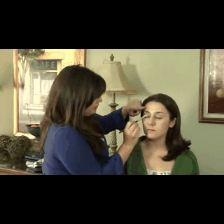

In [13]:

# Convert frames to GIF for visualization
def to_gif(images):
    images = np.clip(images * 255, 0, 255).astype(np.uint8)
    imageio.mimsave('./animation.gif', images, fps=10)
    display(Image(filename='./animation.gif'))

# Visualize sample video
sample_video = frames_from_video_file(file_paths[0], n_frames=10)
to_gif(sample_video)

In [14]:

# Train-test split (80% training, 20% validation)
train_features, val_features, train_targets, val_targets = train_test_split(
    features, targets, test_size=0.2, random_state=42  # Ensure reproducibility
)

# Create an optimized training dataset pipeline using tf.data
train_ds = (
    tf.data.Dataset.from_tensor_slices((train_features, train_targets))  # Convert data into a TensorFlow dataset
    .shuffle(len(train_features))  # Shuffle data to improve training performance
    .batch(batch_size)  # Group data into batches
    .cache()  # Cache data to speed up processing
    .prefetch(tf.data.AUTOTUNE)  # Optimize performance by prefetching data
)

# Create an optimized validation dataset pipeline
valid_ds = (
    tf.data.Dataset.from_tensor_slices((val_features, val_targets))  # Convert validation data into a dataset
    .batch(batch_size)  # Batch validation data
    .cache()  # Cache to speed up validation
    .prefetch(tf.data.AUTOTUNE)  # Optimize performance by prefetching
)

# Cleanup unused variables to free up memory
del features, targets
gc.collect()  # Trigger garbage collection

721

Training Transformer Learning Model (EffiecientNet Family)

In [15]:

from tensorflow import keras

# Load the EfficientNetB0 model without the top classification layer
net = keras.applications.EfficientNetB0(include_top=False)
net.trainable = False  # Freeze the base model to use pre-trained weights


# Define a Sequential model with EfficientNet as a feature extractor
efficient_net_model = keras.Sequential([
    keras.layers.Rescaling(255.0),  # Rescale input pixel values
    keras.layers.TimeDistributed(net),  # Apply the EfficientNet model to each frame separately
    keras.layers.Dense(len(classes)),  # Output layer with the number of classes
    keras.layers.GlobalAveragePooling3D()  # Pooling layer to reduce dimensions
])

# Compile the model with Adam optimizer and sparse categorical cross-entropy loss
efficient_net_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Suitable for integer labels
    metrics=['accuracy']  # Track accuracy during training
)

# Define an early stopping callback to stop training if validation loss doesn't improve
early_stopping = keras.callbacks.EarlyStopping(patience=2, monitor='val_loss')

# Train the model with the training dataset and validate on validation data
history = efficient_net_model.fit(
    train_ds,
    epochs=epochs,
    validation_data=valid_ds,
    callbacks=[early_stopping]
    )# Apply early stopping to prevent overfitting

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 401s 27s/step - accuracy: 0.4596 - loss: 1.0266 - val_accuracy: 0.8519 - val_loss: 0.6025
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 290s 24s/step - accuracy: 0.8819 - loss: 0.5368 - val_accuracy: 0.9259 - val_loss: 0.4408
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 256s 23s/step - accuracy: 0.9234 - loss: 0.3778 - val_accuracy: 0.9259 - val_loss: 0.3200
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 253s 23s/step - accuracy: 0.9626 - loss: 0.2861 - val_accuracy: 0.9753 - val_loss: 0.2604
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 258s 23s/step - accuracy: 0.9763 - loss: 0.2370 - val_accuracy: 0.9753 - val_loss: 0.2214
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 247s 23s/step - accuracy: 0.9794 - loss: 0.2006 - val_accuracy: 0.9877 - val_loss: 0.1887
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 251s 23s/step - accuracy: 0.9832 - loss: 0.1732 - val_accuracy: 0.9877 - val_loss: 0.1659
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 287s 27s/step - accuracy: 0.9832 - loss: 0.1535 - val_accuracy: 0.

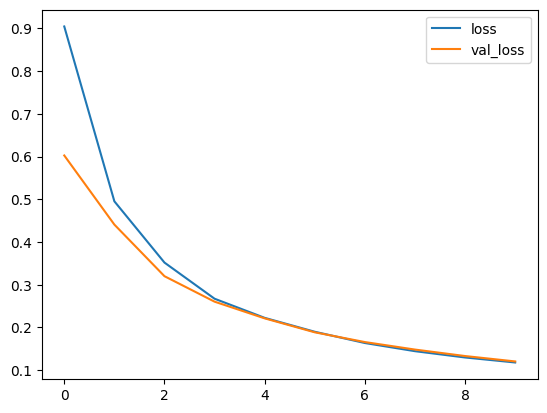

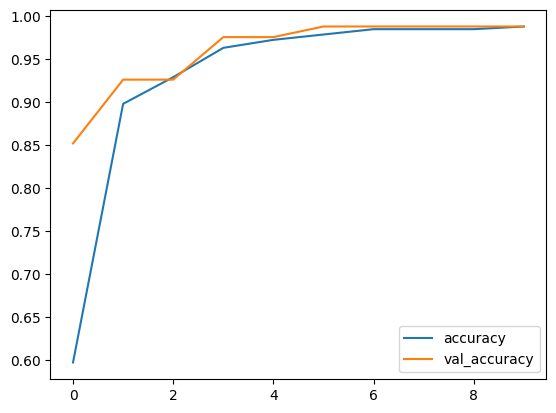

In [16]:

for metrics in [("loss", "val_loss"), ("accuracy", "val_accuracy")]:
    pd.DataFrame(history.history, columns=metrics).plot()
    plt.show

In [17]:

val_loss, val_acc = efficient_net_model.evaluate(valid_ds)
print(f"Validation Loss:{val_loss} Validation Accuracy:{val_acc}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 51s 15s/step - accuracy: 0.9938 - loss: 0.1143
Validation Loss:0.12056997418403625 Validation Accuracy:0.9876543283462524


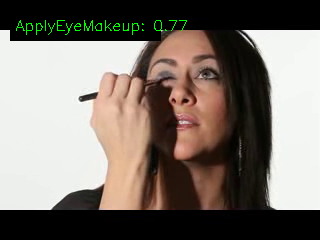

Processing complete! Output saved as 'output.avi'.


In [18]:
import cv2
import numpy as np
import tensorflow as tf
import time
from IPython.display import display, clear_output

def detect_video(video_path, model, class_names, n_frames=10, output_size=(224, 224), frame_step=15):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    # Define video writer for output (optional)
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('output.avi', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

    while cap.isOpened():
        frames = []
        for _ in range(n_frames):
            ret, frame = cap.read()
            if not ret:
                break
            frame_resized = cv2.resize(frame, output_size)
            frame_resized = frame_resized / 255.0  # Normalize
            frames.append(frame_resized)

        if len(frames) < n_frames:
            break  # Stop if not enough frames

        frames = np.array(frames)
        frames = np.expand_dims(frames, axis=0)  # Add batch dimension

        # Predict
        predictions = model.predict(frames)
        class_idx = np.argmax(predictions)
        confidence = np.max(tf.nn.softmax(predictions))

        # Read frame again for display
        ret, frame = cap.read()
        if not ret:
            break

        # Draw a black rectangle for the label
        cv2.rectangle(frame, (10, 10), (160, 40), (0, 0, 0), -1)  # Background box

        # Draw prediction text in the top-left corner (smaller font)
        text = f"{class_names[class_idx]}: {confidence:.2f}"
        cv2.putText(frame, text, (15, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

        # Write to output file
        out.write(frame)

        # Display frame in Jupyter
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        display_frame(frame_rgb)

        # Add small delay for smooth playback
        time.sleep(0.3)

    cap.release()
    out.release()
    print("Processing complete! Output saved as 'output.avi'.")

def display_frame(frame_rgb):
    """ Helper function to display video frames inline in Jupyter Notebook """
    clear_output(wait=True)
    import PIL.Image
    img = PIL.Image.fromarray(frame_rgb)
    display(img)


# Example usage
detect_video("/root/.cache/kagglehub/datasets/pevogam/ucf101/versions/1/UCF101/UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g05_c01.avi", efficient_net_model, classes)

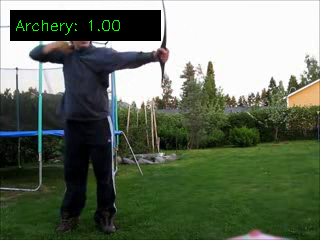

Processing complete! Output saved as 'output.avi'.


In [19]:

# Example usage
detect_video("/root/.cache/kagglehub/datasets/pevogam/ucf101/versions/1/UCF101/UCF-101/Archery/v_Archery_g25_c04.avi", efficient_net_model, classes)

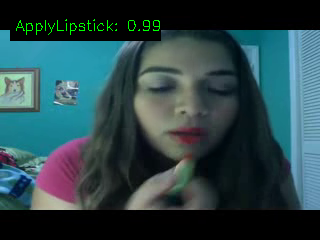

Processing complete! Output saved as 'output.avi'.


In [20]:

# Example usage
detect_video("/root/.cache/kagglehub/datasets/pevogam/ucf101/versions/1/UCF101/UCF-101/ApplyLipstick/v_ApplyLipstick_g12_c01.avi", efficient_net_model, classes)